In [1]:
!ls

NST-EST2014-01.csv      u.item                  w4d2-regex.ipynb
README.md               u.user                  w4d2-ufo.ipynb
__pycache__             ufo_awesome.tsv         w4d2.ipynb
accounts.py             w4d1-cleaning.ipynb     w4d3.ipynb
baby_names.csv          w4d1-household.ipynb    w4d4-census.ipynb
complaints_dec_2014.csv w4d1-review.ipynb       wdi_data_extract.csv
rdu-daily-2014.csv      w4d1.ipynb
u.data                  w4d2-hw-review.ipynb


In [11]:
!head -n 5 NST-EST2014-01.csv

In [4]:
!tail NST-EST2014-01.csv

A lot of data files we might deal with have extra/junk rows at the head and the tail

In [5]:
import pandas as pd
import numpy as np

In [12]:
pd.read_csv('NST-EST2014-01.csv').head()

,table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Table 1. Annual Estimates of the Resident Popu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Geographic Area,"April 1, 2010",NaN,Population Estimate (as of July 1),NaN,NaN,NaN,NaN
2,NaN,Census,Estimates Base,2010,2011,2012,2013,2014
3,United States,"308,745,538","308,758,105","309,347,057","311,721,632","314,112,078","316,497,531","318,857,056"
4,Northeast,"55,317,240","55,318,348","55,381,690","55,635,670","55,832,038","56,028,220","56,152,333"


In [14]:
pd.read_csv('NST-EST2014-01.csv', header=3).head()

,Unnamed: 0,Census,Estimates Base,2010,2011,2012,2013,2014
0,United States,"308,745,538","308,758,105","309,347,057","311,721,632","314,112,078","316,497,531","318,857,056"
1,Northeast,"55,317,240","55,318,348","55,381,690","55,635,670","55,832,038","56,028,220","56,152,333"
2,Midwest,"66,927,001","66,929,898","66,972,390","67,149,657","67,331,458","67,567,871","67,745,108"
3,South,"114,555,744","114,562,951","114,871,231","116,089,908","117,346,322","118,522,802","119,771,934"
4,West,"71,945,553","71,946,908","72,121,746","72,846,397","73,602,260","74,378,638","75,187,681"


In [15]:
pop_data = pd.read_csv('NST-EST2014-01.csv', header=3)

In [16]:
pop_data.head()

,Unnamed: 0,Census,Estimates Base,2010,2011,2012,2013,2014
0,United States,"308,745,538","308,758,105","309,347,057","311,721,632","314,112,078","316,497,531","318,857,056"
1,Northeast,"55,317,240","55,318,348","55,381,690","55,635,670","55,832,038","56,028,220","56,152,333"
2,Midwest,"66,927,001","66,929,898","66,972,390","67,149,657","67,331,458","67,567,871","67,745,108"
3,South,"114,555,744","114,562,951","114,871,231","116,089,908","117,346,322","118,522,802","119,771,934"
4,West,"71,945,553","71,946,908","72,121,746","72,846,397","73,602,260","74,378,638","75,187,681"


In [18]:
pop_data['geographic_area'] = pop_data.pop('Unnamed: 0')

In [19]:
pop_data.head()

,Census,Estimates Base,2010,2011,2012,2013,2014,geographic_area
0,"308,745,538","308,758,105","309,347,057","311,721,632","314,112,078","316,497,531","318,857,056",United States
1,"55,317,240","55,318,348","55,381,690","55,635,670","55,832,038","56,028,220","56,152,333",Northeast
2,"66,927,001","66,929,898","66,972,390","67,149,657","67,331,458","67,567,871","67,745,108",Midwest
3,"114,555,744","114,562,951","114,871,231","116,089,908","117,346,322","118,522,802","119,771,934",South
4,"71,945,553","71,946,908","72,121,746","72,846,397","73,602,260","74,378,638","75,187,681",West


In [20]:
pop_data.index = pop_data.pop('geographic_area')

In [21]:
pop_data.head()

,Census,Estimates Base,2010,2011,2012,2013,2014
geographic_area,,,,,,,
United States,"308,745,538","308,758,105","309,347,057","311,721,632","314,112,078","316,497,531","318,857,056"
Northeast,"55,317,240","55,318,348","55,381,690","55,635,670","55,832,038","56,028,220","56,152,333"
Midwest,"66,927,001","66,929,898","66,972,390","67,149,657","67,331,458","67,567,871","67,745,108"
South,"114,555,744","114,562,951","114,871,231","116,089,908","117,346,322","118,522,802","119,771,934"
West,"71,945,553","71,946,908","72,121,746","72,846,397","73,602,260","74,378,638","75,187,681"


In [23]:
pop_data.loc['.North Carolina', '2010']

'9,559,488'

In [24]:
pop_data.head(10)

,Census,Estimates Base,2010,2011,2012,2013,2014
geographic_area,,,,,,,
United States,"308,745,538","308,758,105","309,347,057","311,721,632","314,112,078","316,497,531","318,857,056"
Northeast,"55,317,240","55,318,348","55,381,690","55,635,670","55,832,038","56,028,220","56,152,333"
Midwest,"66,927,001","66,929,898","66,972,390","67,149,657","67,331,458","67,567,871","67,745,108"
South,"114,555,744","114,562,951","114,871,231","116,089,908","117,346,322","118,522,802","119,771,934"
West,"71,945,553","71,946,908","72,121,746","72,846,397","73,602,260","74,378,638","75,187,681"
.Alabama,"4,779,736","4,780,127","4,785,822","4,801,695","4,817,484","4,833,996","4,849,377"
.Alaska,"710,231","710,249","713,856","722,572","731,081","737,259","736,732"
.Arizona,"6,392,017","6,392,310","6,411,999","6,472,867","6,556,236","6,634,997","6,731,484"
.Arkansas,"2,915,918","2,915,958","2,922,297","2,938,430","2,949,300","2,958,765","2,966,369"


In [25]:
pop_data.iloc[5] # 0-based row access

Census            4,779,736
Estimates Base    4,780,127
2010              4,785,822
2011              4,801,695
2012              4,817,484
2013              4,833,996
2014              4,849,377
Name: .Alabama, dtype: object

In [28]:
pop_data.loc['.Alabama'] # label-based row access, same result as iloc above

Census            4,779,736
Estimates Base    4,780,127
2010              4,785,822
2011              4,801,695
2012              4,817,484
2013              4,833,996
2014              4,849,377
Name: .Alabama, dtype: object

In [31]:
pop_data.loc['.Alabama', ['Census', '2010']]

Census    4,779,736
2010      4,785,822
Name: .Alabama, dtype: object

In [33]:
pop_data.loc[['.Alabama', '.North Carolina']]

,Census,Estimates Base,2010,2011,2012,2013,2014
geographic_area,,,,,,,
.Alabama,"4,779,736","4,780,127","4,785,822","4,801,695","4,817,484","4,833,996","4,849,377"
.North Carolina,"9,535,483","9,535,691","9,559,488","9,651,502","9,748,181","9,848,917","9,943,964"


In [35]:
pop_data.tail(10)

,Census,Estimates Base,2010,2011,2012,2013,2014
geographic_area,,,,,,,
.West Virginia,"1,852,994","1,853,033","1,854,176","1,854,982","1,856,313","1,853,595","1,850,326"
.Wisconsin,"5,686,986","5,687,289","5,689,268","5,708,785","5,724,888","5,742,953","5,757,564"
.Wyoming,"563,626","563,767","564,358","567,631","576,893","583,223","584,153"
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Puerto Rico,"3,725,789","3,726,157","3,721,527","3,686,771","3,642,281","3,595,839","3,548,397"
"Note: The estimates are based on the 2010 Census and reflect changes to the April 1, 2010 population due to the Count Question Resolution program and geographic program revisions. See Geographic Terms and Definitions at http://www.census.gov/popest/about/geo/terms.html for a list of the states that are included in each region. All geographic boundaries for the 2014 population estimates series are defined as of January 1, 2014. For population estimates methodology statements, see http://www.census.gov/popest/methodology/index.html.",NaN,NaN,NaN,NaN,NaN,NaN,NaN
Suggested Citation:,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Table 1. Annual Estimates of the Resident Population for the United States, Regions, States, and Puerto Rico: April 1, 2010 to July 1, 2014 (NST-EST2014-01)",NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Source: U.S. Census Bureau, Population Division",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
pop_data.dropna().tail()

,Census,Estimates Base,2010,2011,2012,2013,2014
geographic_area,,,,,,,
.Washington,"6,724,540","6,724,543","6,741,911","6,822,112","6,896,325","6,973,742","7,061,530"
.West Virginia,"1,852,994","1,853,033","1,854,176","1,854,982","1,856,313","1,853,595","1,850,326"
.Wisconsin,"5,686,986","5,687,289","5,689,268","5,708,785","5,724,888","5,742,953","5,757,564"
.Wyoming,"563,626","563,767","564,358","567,631","576,893","583,223","584,153"
Puerto Rico,"3,725,789","3,726,157","3,721,527","3,686,771","3,642,281","3,595,839","3,548,397"


In [40]:
pop_data.tail(10)

,Census,Estimates Base,2010,2011,2012,2013,2014
geographic_area,,,,,,,
.West Virginia,"1,852,994","1,853,033","1,854,176","1,854,982","1,856,313","1,853,595","1,850,326"
.Wisconsin,"5,686,986","5,687,289","5,689,268","5,708,785","5,724,888","5,742,953","5,757,564"
.Wyoming,"563,626","563,767","564,358","567,631","576,893","583,223","584,153"
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Puerto Rico,"3,725,789","3,726,157","3,721,527","3,686,771","3,642,281","3,595,839","3,548,397"
"Note: The estimates are based on the 2010 Census and reflect changes to the April 1, 2010 population due to the Count Question Resolution program and geographic program revisions. See Geographic Terms and Definitions at http://www.census.gov/popest/about/geo/terms.html for a list of the states that are included in each region. All geographic boundaries for the 2014 population estimates series are defined as of January 1, 2014. For population estimates methodology statements, see http://www.census.gov/popest/methodology/index.html.",NaN,NaN,NaN,NaN,NaN,NaN,NaN
Suggested Citation:,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Table 1. Annual Estimates of the Resident Population for the United States, Regions, States, and Puerto Rico: April 1, 2010 to July 1, 2014 (NST-EST2014-01)",NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Source: U.S. Census Bureau, Population Division",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
pop_data = pop_data.dropna(how='all')

In [43]:
pop_data.tail()

,Census,Estimates Base,2010,2011,2012,2013,2014
geographic_area,,,,,,,
.Washington,"6,724,540","6,724,543","6,741,911","6,822,112","6,896,325","6,973,742","7,061,530"
.West Virginia,"1,852,994","1,853,033","1,854,176","1,854,982","1,856,313","1,853,595","1,850,326"
.Wisconsin,"5,686,986","5,687,289","5,689,268","5,708,785","5,724,888","5,742,953","5,757,564"
.Wyoming,"563,626","563,767","564,358","567,631","576,893","583,223","584,153"
Puerto Rico,"3,725,789","3,726,157","3,721,527","3,686,771","3,642,281","3,595,839","3,548,397"


In [50]:
# drop a row by naming the index
pop_data.drop('Puerto Rico', axis=0).tail()

,Census,Estimates Base,2010,2011,2012,2013,2014
geographic_area,,,,,,,
.Virginia,"8,001,024","8,001,023","8,025,376","8,110,188","8,193,422","8,270,345","8,326,289"
.Washington,"6,724,540","6,724,543","6,741,911","6,822,112","6,896,325","6,973,742","7,061,530"
.West Virginia,"1,852,994","1,853,033","1,854,176","1,854,982","1,856,313","1,853,595","1,850,326"
.Wisconsin,"5,686,986","5,687,289","5,689,268","5,708,785","5,724,888","5,742,953","5,757,564"
.Wyoming,"563,626","563,767","564,358","567,631","576,893","583,223","584,153"


In [51]:
# drop a column by naming the column and the axis
pop_data.drop('2010', axis=1).head()

,Census,Estimates Base,2011,2012,2013,2014
geographic_area,,,,,,
United States,"308,745,538","308,758,105","311,721,632","314,112,078","316,497,531","318,857,056"
Northeast,"55,317,240","55,318,348","55,635,670","55,832,038","56,028,220","56,152,333"
Midwest,"66,927,001","66,929,898","67,149,657","67,331,458","67,567,871","67,745,108"
South,"114,555,744","114,562,951","116,089,908","117,346,322","118,522,802","119,771,934"
West,"71,945,553","71,946,908","72,846,397","73,602,260","74,378,638","75,187,681"


In [52]:
pop_data.index

Index(['United States', 'Northeast', 'Midwest', 'South', 'West', '.Alabama',
       '.Alaska', '.Arizona', '.Arkansas', '.California', '.Colorado',
       '.Connecticut', '.Delaware', '.District of Columbia', '.Florida',
       '.Georgia', '.Hawaii', '.Idaho', '.Illinois', '.Indiana', '.Iowa',
       '.Kansas', '.Kentucky', '.Louisiana', '.Maine', '.Maryland',
       '.Massachusetts', '.Michigan', '.Minnesota', '.Mississippi',
       '.Missouri', '.Montana', '.Nebraska', '.Nevada', '.New Hampshire',
       '.New Jersey', '.New Mexico', '.New York', '.North Carolina',
       '.North Dakota', '.Ohio', '.Oklahoma', '.Oregon', '.Pennsylvania',
       '.Rhode Island', '.South Carolina', '.South Dakota', '.Tennessee',
       '.Texas', '.Utah', '.Vermont', '.Virginia', '.Washington',
       '.West Virginia', '.Wisconsin', '.Wyoming', 'Puerto Rico'],
      dtype='object', name='geographic_area')

In [59]:
i_as_series = pop_data.index.to_series()
pop_data.index = i_as_series.str.replace(r'^\.', '')

In [62]:
pop_data.head(10)

,Census,Estimates Base,2010,2011,2012,2013,2014
geographic_area,,,,,,,
United States,"308,745,538","308,758,105","309,347,057","311,721,632","314,112,078","316,497,531","318,857,056"
Northeast,"55,317,240","55,318,348","55,381,690","55,635,670","55,832,038","56,028,220","56,152,333"
Midwest,"66,927,001","66,929,898","66,972,390","67,149,657","67,331,458","67,567,871","67,745,108"
South,"114,555,744","114,562,951","114,871,231","116,089,908","117,346,322","118,522,802","119,771,934"
West,"71,945,553","71,946,908","72,121,746","72,846,397","73,602,260","74,378,638","75,187,681"
Alabama,"4,779,736","4,780,127","4,785,822","4,801,695","4,817,484","4,833,996","4,849,377"
Alaska,"710,231","710,249","713,856","722,572","731,081","737,259","736,732"
Arizona,"6,392,017","6,392,310","6,411,999","6,472,867","6,556,236","6,634,997","6,731,484"
Arkansas,"2,915,918","2,915,958","2,922,297","2,938,430","2,949,300","2,958,765","2,966,369"


In [72]:
# Eliminate territories using slicing

# Note that slicing works on dataframes, 
# but indexing with a number [5] requires 
# using iloc or non-label-based indexes

pop_data = pop_data[5:]

In [73]:
pop_data.head()

,Census,Estimates Base,2010,2011,2012,2013,2014
geographic_area,,,,,,,
Alabama,"4,779,736","4,780,127","4,785,822","4,801,695","4,817,484","4,833,996","4,849,377"
Alaska,"710,231","710,249","713,856","722,572","731,081","737,259","736,732"
Arizona,"6,392,017","6,392,310","6,411,999","6,472,867","6,556,236","6,634,997","6,731,484"
Arkansas,"2,915,918","2,915,958","2,922,297","2,938,430","2,949,300","2,958,765","2,966,369"
California,"37,253,956","37,254,503","37,336,011","37,701,901","38,062,780","38,431,393","38,802,500"


In [74]:
pop_data.Census.sum()

'4,779,736710,2316,392,0172,915,91837,253,9565,029,1963,574,097897,934601,72318,801,3109,687,6531,360,3011,567,58212,830,6326,483,8023,046,3552,853,1184,339,3674,533,3721,328,3615,773,5526,547,6299,883,6405,303,9252,967,2975,988,927989,4151,826,3412,700,5511,316,4708,791,8942,059,17919,378,1029,535,483672,59111,536,5043,751,3513,831,07412,702,3791,052,5674,625,364814,1806,346,10525,145,5612,763,885625,7418,001,0246,724,5401,852,9945,686,986563,6263,725,789'

# Converting Numbers

Here's the thing - converting numbers with ,s is a little more complicated than what we're used to. Not much though


In [75]:
int('1,000')

ValueError: invalid literal for int() with base 10: '1,000'

In [76]:
int(pop_data.Census)

TypeError: cannot convert the series to <class 'int'>

In [77]:
import locale

In [78]:
help(locale.atoi)

Help on function atoi in module locale:

atoi(str)
    Converts a string to an integer according to the locale settings.



We need to configure locale before using the functions

To be safe we should be explicit

In [93]:
locale.setlocale(locale.LC_NUMERIC, '')

'en_US.UTF-8'

In [81]:
locale.atoi('1,000,134,643')

1000134643

In [84]:
locale.atof('1,45245234,34.514514')

14524523434.514515

In [85]:
locale.setlocale(locale.LC_NUMERIC, 'de_DE')

'de_DE'

In [87]:
locale.atof('1,45')

1.45

In [92]:
locale.setlocale(locale.LC_MONETARY, '')

locale.currency(55.63)

'$55.63'

In [95]:
locale.setlocale(locale.LC_NUMERIC, '')
pop_data = pop_data.applymap(locale.atoi)

In [99]:
pop_data['2012'].mean()

6110660.75

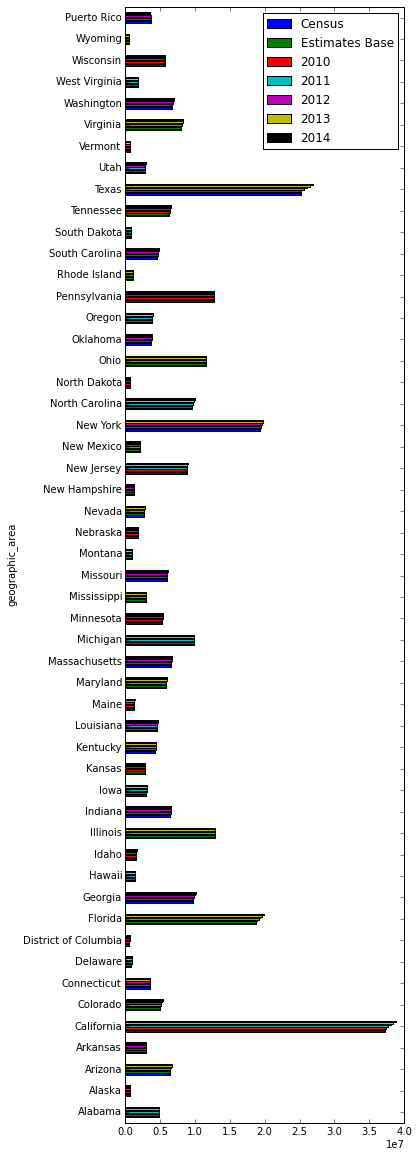

In [106]:
%matplotlib inline
pop_data.plot(kind='barh', figsize=(5, 20))

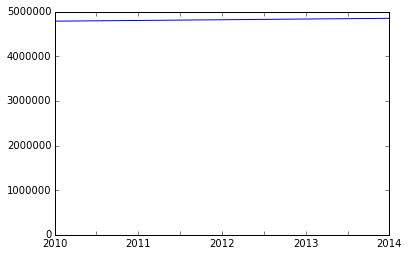

In [113]:
pop_data.loc['Alabama', ['2010', '2011', '2012', '2013', '2014']].plot(kind='line', ylim=(0,5000000))